# Resumo


Neste projeto será feita uma análise exploratória de um conjunto de dados de uma empresa de publicidade, indicando se um usuário de internet específico clicou ou não em uma propaganda. Será criado um modelo que preveja se a pessoa clicará ou não em um anúncio baseado nos recursos desse usuário.


In [137]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Visão geral do dataset

In [138]:
df = pd.read_csv('advertising.csv')
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

# Informações adicionais

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


***
# Traduzindo colunas

In [140]:
df.columns = ['minutos no site', 'idade', 'renda anual',
       'minutos de navegacao por dia', 'titulo do anuncio', 'cidade do cliente', 'sexo', 'nacionalidade',
       'horario que saiu da internet', 'clicou no anuncio']

In [141]:
df.head()

minutos no site  idade  renda anual  minutos de navegacao por dia  \
0            68.95     35     61833.90                        256.09   
1            80.23     31     68441.85                        193.77   
2            69.47     26     59785.94                        236.50   
3            74.15     29     54806.18                        245.89   
4            68.37     35     73889.99                        225.58   

                       titulo do anuncio cidade do cliente  sexo  \
0     Cloned 5thgeneration orchestration       Wrightburgh     0   
1     Monitored national standardization         West Jodi     1   
2       Organic bottom-line service-desk          Davidton     0   
3  Triple-buffered reciprocal time-frame    West Terrifurt     1   
4          Robust logistical utilization      South Manuel     0   

  nacionalidade horario que saiu da internet  clicou no anuncio  
0       Tunisia          2016-03-27 00:53:11                  0  
1         Nauru          2016-04-04 01:39:02                  0  
2    San Marino          2016-03-13 20:35:42                  0  
3         Italy          2016-01-10 02:31:19                  0  
4       Iceland          2016-06-03 03:36:18                  0

# Visualizando distribuição de idade dos clientes

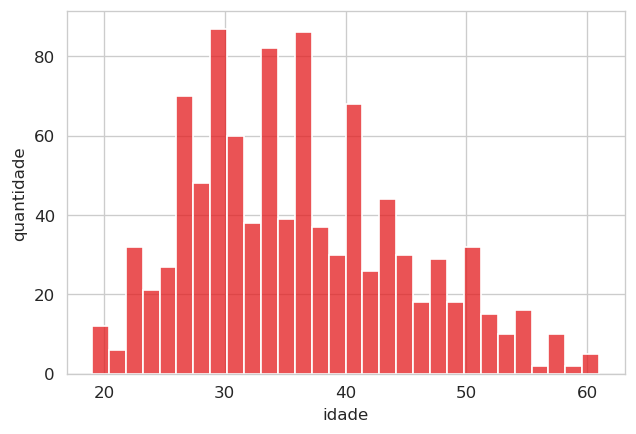

In [142]:
sns.set_style("whitegrid")
plt.figure(dpi=120)
sns.set_palette("Set1")
plt.ylabel("quantidade")
sns.histplot(data=df, x='idade',bins=30)
plt.show()

Obs: A maioria dos clientes estão na faixa dos 30 aos 40 anos
***


# Visualizando quem clicou baseado na renda dos clientes e na idade

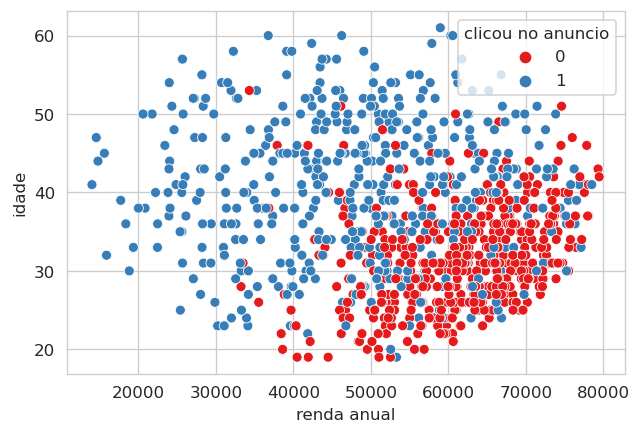

In [143]:
plt.figure(dpi=120)
sns.set_palette("Set1")
sns.scatterplot(x='renda anual',hue="clicou no anuncio", y='idade', data=df)
plt.show()

Obs: Observamos que as pessoas com uma maior renda são as que menos clicam nos anúncios
***

# Visualizando quantidade de tempo em minutos que o cliente passa por dia **na internet** por idade

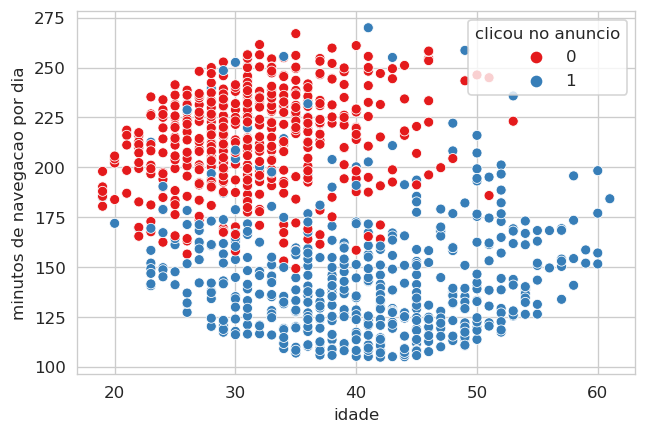

In [144]:
sns.set_palette("Set1")
plt.figure(dpi=120)
sns.scatterplot(x='idade', hue="clicou no anuncio", y='minutos de navegacao por dia', data=df)
plt.show()

Curiosamente as pessoas que mais passam tempo na internet, são as que menos clicam nos anúncios
***

# Visualizando quantidade de tempo em minutos que o cliente passa por dia **no site** por idade

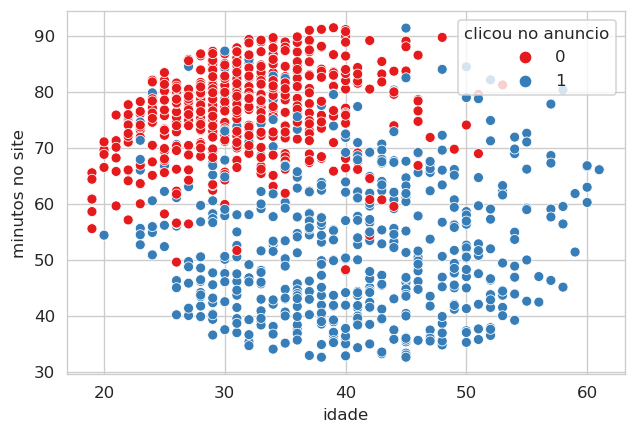

In [145]:
sns.set_palette("Set1")
plt.figure(dpi=120)
sns.scatterplot(x='idade', hue="clicou no anuncio", y='minutos no site', data=df)
plt.show()

***
# Verificando os tipos de anúncios mais clicados

In [146]:
df["titulo do anuncio"].value_counts()

Optimized static archive                       1
Cross-group value-added success                1
Automated coherent flexibility                 1
Automated client-driven orchestration          1
Customizable modular Internet solution         1
                                              ..
Fundamental fault-tolerant neural-net          1
Enhanced systematic adapter                    1
Seamless bandwidth-monitored knowledge user    1
Digitized radical array                        1
Right-sized system-worthy project              1
Name: titulo do anuncio, Length: 1000, dtype: int64

Os anúncios nao se repetem
***

# Agrupamentos

### Agrupando media de minutos que o cliente passa no site por sexo


In [147]:
df[['minutos no site','sexo']].groupby('sexo').mean().sort_values(by='minutos no site',ascending=False)

minutos no site
sexo                 
0           65.289287
1           64.688274

Obs: foi observado que tanto mulheres(0) quanto homens(1) passam em media 65 minutos no site
***

### Agrupando media de minutos que os clientes passam navegando na internet por sexo

In [148]:
df[['minutos de navegacao por dia','sexo']].groupby('sexo').mean().sort_values(by='minutos de navegacao por dia',ascending=False)

minutos de navegacao por dia
sexo                              
1                       181.276923
0                       178.816763

Obs: Clientes homens passam um pouco mais de tempo na internet que as mulheres
***

### Agrupando media de clientes que clicaram nos anuncios por sexo

In [149]:
df[['clicou no anuncio','sexo']].groupby('sexo').mean()

clicou no anuncio
sexo                   
0              0.518304
1              0.480249

Obs: As mulheres são mais propensas a clicarem nos anúncios
***

# Visualizando os dados acima em forma de gráfico

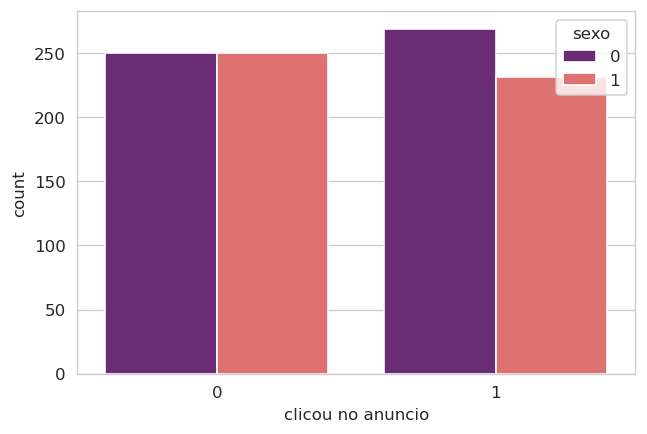

In [150]:
plt.figure(dpi=120)
plt.ylabel("Quantidade")
sns.countplot(data=df, x='clicou no anuncio',hue='sexo',palette="magma")
plt.show()


***


# Eliminando colunas desnecessárias

In [151]:
df.drop(['titulo do anuncio','cidade do cliente','nacionalidade','horario que saiu da internet'], axis=1, inplace=True)
df.head()

minutos no site  idade  renda anual  minutos de navegacao por dia  sexo  \
0            68.95     35     61833.90                        256.09     0   
1            80.23     31     68441.85                        193.77     1   
2            69.47     26     59785.94                        236.50     0   
3            74.15     29     54806.18                        245.89     1   
4            68.37     35     73889.99                        225.58     0   

   clicou no anuncio  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

***
# Tendo uma visão geral de como os dados se relacionam baseado em quem clicou no anúncio ou não

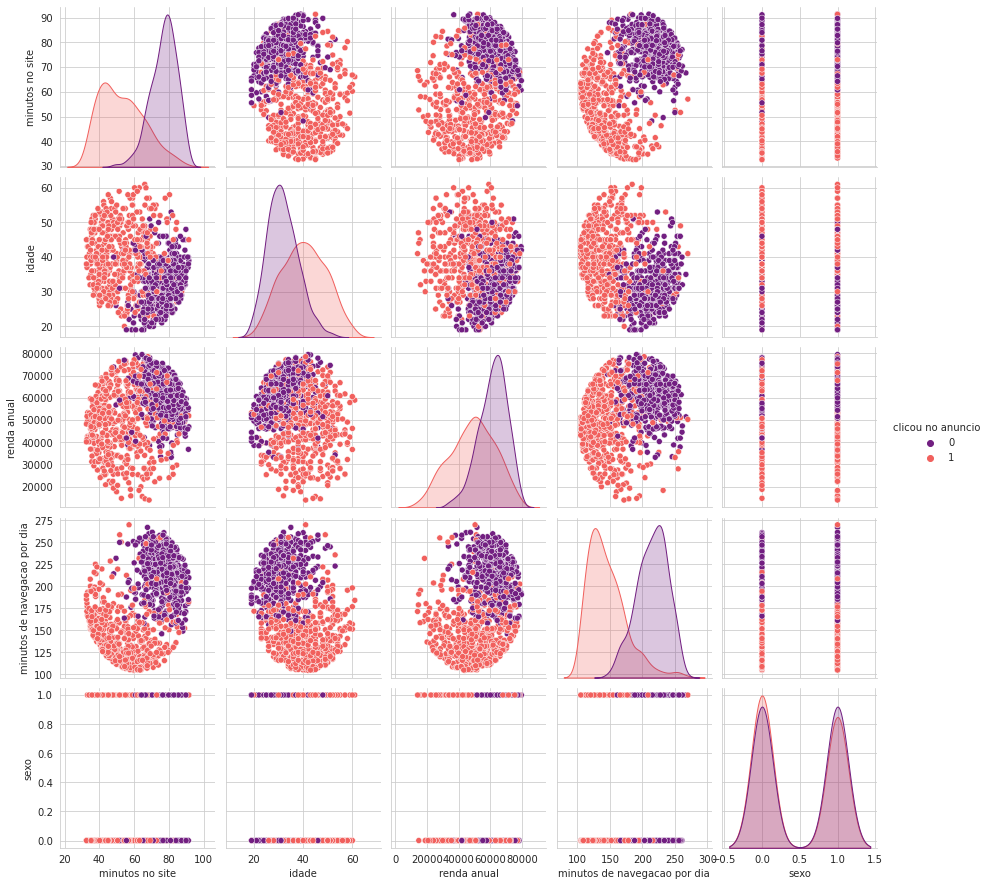

In [152]:
sns.pairplot(df, hue="clicou no anuncio", palette="magma")


***
# Modelos escolhidos: Logistic Regression, Random Forest, SVC, Gradient Boosting e KNN

Por se tratar de um problema de classificação, foram escolhidos estes modelos, apesar de também existir mais alternativas para este tipo de problema, agora é hora de quebrar os dados em treino e teste e fitar os modelos.


In [153]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [154]:
X = df.iloc[:,:-1]
y = df['clicou no anuncio']

In [155]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=123)

## Instanciando modelos

In [156]:
logmodel = LogisticRegression()
rfmodel = RandomForestClassifier()
svcmodel = SVC()
gradmodel = GradientBoostingClassifier()
knnmodel = KNeighborsClassifier()

## Treino

In [157]:
logmodel.fit(Xtrain, ytrain)
rfmodel.fit(Xtrain, ytrain)
svcmodel.fit(Xtrain, ytrain)
gradmodel.fit(Xtrain, ytrain)
knnmodel.fit(Xtrain, ytrain)

KNeighborsClassifier()

In [158]:
logpredi = logmodel.predict(Xtest)
rfpredi = rfmodel.predict(Xtest)
svcpredi = svcmodel.predict(Xtest)
gradpredi = gradmodel.predict(Xtest)
knnpredi = knnmodel.predict(Xtest)

## Armazenando Métricas gerais(acurácia, revocação, precisão e F1-score)

In [159]:
preds = np.array([gradpredi, logpredi, rfpredi, svcpredi, knnpredi])
modelos = "GradientBoosting LogisticRegression RandomForest SVC KNN".split()
acuracia = []
precisao = []
f1 = []
revocacao = []
for i in preds:
    acuracia.append(accuracy_score(ytest, i)*100)
    precisao.append(precision_score(ytest, i)*100)
    f1.append(f1_score(ytest, i)*100)
    revocacao.append(recall_score(ytest, i)*100)

metricasGerais = pd.DataFrame({
    "Modelo":modelos,
    "Acuracia":acuracia,
    "F1":f1,
    "Precisao":precisao,
    "Revocacao":revocacao
}).sort_values(by="F1",ascending=False)


***
## Visualizando Métricas gerais

In [160]:
metricasGerais

Modelo   Acuracia         F1   Precisao  Revocacao
2        RandomForest  97.666667  97.627119  97.297297  97.959184
0    GradientBoosting  97.000000  96.969697  96.000000  97.959184
1  LogisticRegression  90.000000  89.436620  92.700730  86.394558
4                 KNN  68.333333  66.192171  69.402985  63.265306
3                 SVC  67.000000  59.591837  74.489796  49.659864

***
# Conclusão:
Para este caso, modelo Random Forest obteve o melhor desempenho em todas as métricas avaliativas 